In [2]:
#scraping the first 5 pages, sample(40 reviews).
import scrapy


class AmazonreviewsSpider(scrapy.Spider):
    name = 'amazonreviews'
    myBaseUrl = 'https://www.amazon.com/product-reviews/B01IO1VPYG/ref=cm_cr_arp_d_viewopt_sr?pageNumber='
    start_urls = []

    # Creating list of urls to be scraped by appending page number a the end of base url
    for i in range(1,5):
        start_urls.append(myBaseUrl+str(i))    

    def parse(self, response):
        data = response.css('#cm_cr-review_list')

        # Collecting product star ratings
        star_rating = data.css('.review-rating')

        # Collecting user reviews
        comments = data.css('.review-text')
        count = 0

        # Combining the results
        for review in star_rating:
            yield{'stars': ''.join(review.xpath('.//text()').extract()),
                  'comment': ''.join(comments[count].xpath(".//text()").extract())
                 }
            count=count+1


In [3]:
import pandas as pd
import numpy as np

In [4]:
df= pd.read_csv('amazonreviews.csv')

In [6]:
df.head(10)

,stars,comment
0,2.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Cheap part...
1,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n I'm sure i...
2,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n I got this...
3,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n My nephew ...
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n I bought t...
5,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n I have ord...
6,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Received a...
7,4.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Great litt...
8,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Thank you!...
9,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Perfect! W...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
stars      40 non-null object
comment    40 non-null object
dtypes: object(2)
memory usage: 768.0+ bytes


In [8]:
df.shape

(40, 2)

In [ ]:
#preparing the dataset-cleaning
#Preparing the data for modeling

In [10]:
df["reviews"] = df["comment"].str.replace('\n', '', regex=True)  #removing extra spaces from the comments

In [11]:
df["ratings"] = df["stars"].replace('out of 5 stars', '', regex=True) #removing the attachement out of 5 stars. Only the rating left

In [12]:
df['reviews']=(df['reviews'].iloc[0:-1].str.lower())

In [13]:
#deleting columns to only be left with the cleaned columns
del df["comment"]
del df["stars"]

In [14]:
df.head()

,reviews,ratings
0,cheap parts. broke in the first hour...,2.0
1,i'm sure it'd he fun if it worked. b...,1.0
2,i got this for a christmas gift and ...,5.0
3,my nephew opened this on christmas e...,1.0
4,i bought this for my young brother a...,5.0


In [15]:
#remove punctuations using re
pattern = r"[^\w\s]"
df["reviews"] = df["reviews"].str.replace(pat=pattern, repl=" ", regex=True)
print(df['reviews'].iloc[0:-1])

0               cheap parts  broke in the first hour...
1               i m sure it d he fun if it worked  b...
2               i got this for a christmas gift and ...
3               my nephew opened this on christmas e...
4               i bought this for my young brother a...
5               i have ordered from this company sev...
6                 received and wouldn t even turn on   
7               great little drone  works really wel...
8                                          thank you   
9               perfect  was a gift for my son he lo...
10              this was my first drone   it s fast ...
11              i bought this mini orion drone spur ...
12              received this as a christmas gift   ...
13              i received this as a gift and was ti...
14              did not like this thing one bit   i ...
15              set it all up and charged batteries ...
16              i purchased one from the same manufa...
17                        works for like five mi

In [ ]:
#Exploring the data... Distribution of the star ratings

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
a = df["ratings"]

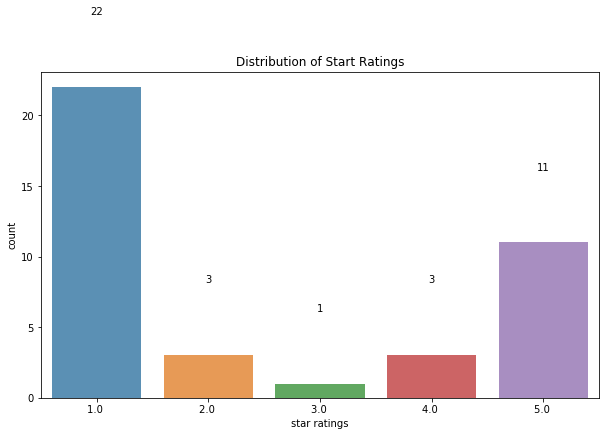

In [18]:
x= a.value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax=sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of Start Ratings")
plt.ylabel('count')
plt.xlabel('star ratings')
rects=ax.patches
labels=x.values
for rect, label in zip(rects,labels):
    height=rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [ ]:
#Natural Language Processing.
#removing stopwords
#tokenizing
#stemming and lemmatization

In [21]:
import nltk
import string
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer


In [22]:
df.dropna()

,reviews,ratings
0,cheap parts broke in the first hour...,2.0
1,i m sure it d he fun if it worked b...,1.0
2,i got this for a christmas gift and ...,5.0
3,my nephew opened this on christmas e...,1.0
4,i bought this for my young brother a...,5.0
5,i have ordered from this company sev...,1.0
6,received and wouldn t even turn on,1.0
7,great little drone works really wel...,4.0
8,thank you,5.0
9,perfect was a gift for my son he lo...,5.0


In [23]:
df["reviews"] = df["reviews"].astype(str)

In [24]:
#remove extra spaces
pattern = r"[\s]+"
df["reviews"] = df["reviews"].str.replace(pat=pattern, repl=" ", regex=True)

In [25]:
stop_words = stopwords.words("english")

In [26]:
# Function to remove stop words 
def stopwords_removal(review):
    review_tokenized = word_tokenize(review)
    review_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return review_new

# Removing stopwords
df['review_processed'] = [stopwords_removal(r) for r in df['reviews']]

In [27]:
df.head()

,reviews,ratings,review_processed
0,cheap parts broke in the first hour unable to...,2.0,cheap parts broke first hour unable repair
1,i m sure it d he fun if it worked battery was...,1.0,sure fun worked battery already installed mean...
2,i got this for a christmas gift and he has al...,5.0,got christmas gift already played hours since ...
3,my nephew opened this on christmas eve and it...,1.0,nephew opened christmas eve make next morning ...
4,i bought this for my young brother and he lov...,5.0,bought young brother loves every thing works p...


In [28]:
#tokenizing
corpora = df["review_processed"].values
tokenized = [corpus.split(" ") for corpus in corpora]

print(tokenized[0:-1])

[['cheap', 'parts', 'broke', 'first', 'hour', 'unable', 'repair'], ['sure', 'fun', 'worked', 'battery', 'already', 'installed', 'meaning', 'used', 'instructions', 'hard', 'follow', 'isnt', 'even', 'micro', 'sd', 'port', 'says', 'kinda', 'think', 'thing', 'prank', 'see', 'much', 'time', 'waste', 'lol'], ['got', 'christmas', 'gift', 'already', 'played', 'hours', 'since', 'opening', 'highly', 'recommended', 'age'], ['nephew', 'opened', 'christmas', 'eve', 'make', 'next', 'morning', 'disappointed', 'everything', 'product'], ['bought', 'young', 'brother', 'loves', 'every', 'thing', 'works', 'perfect', 'fly', '10', 'minutes'], ['ordered', 'company', 'several', 'times', 'everything', 'ever', 'bought', 'junk', 'world', 'tech', 'toys'], ['received', 'even', 'turn'], ['great', 'little', 'drone', 'works', 'really', 'well', 'make', 'sure', 'plenty', 'room', 'get', 'hang'], ['thank'], ['perfect', 'gift', 'son', 'loves'], ['first', 'drone', 'fast', 'take', 'time', 'learn', 'get', 'like', 'trying', '

In [29]:
#USING POLARITY FOR DETERMINING SENTIMENTS
from textblob import TextBlob

In [30]:
#function for getting polarity and subjectivity for each review
def sentiment_function(review_processed):
    try:
        return TextBlob(review_processed).sentiment
    except:
        return None

In [31]:
df["Pol_Sub"] = df["review_processed"].apply(sentiment_function)

In [32]:
df.head()

,reviews,ratings,review_processed,Pol_Sub
0,cheap parts broke in the first hour unable to...,2.0,cheap parts broke first hour unable repair,"(0.05000000000000001, 0.5111111111111111)"
1,i m sure it d he fun if it worked battery was...,1.0,sure fun worked battery already installed mean...,"(0.21805555555555556, 0.4217592592592592)"
2,i got this for a christmas gift and he has al...,5.0,got christmas gift already played hours since ...,"(0.16, 0.5399999999999999)"
3,my nephew opened this on christmas eve and it...,1.0,nephew opened christmas eve make next morning ...,"(-0.375, 0.375)"
4,i bought this for my young brother and he lov...,5.0,bought young brother loves every thing works p...,"(0.6333333333333334, 0.7666666666666666)"


In [33]:
#spliting the column to get distinct values

df["Pol_Sub"][0][0]

df["Polarity"]=df["Pol_Sub"].apply(lambda x:x[0])

df["Subjectivity"]=df["Pol_Sub"].apply(lambda x:x[1])


In [34]:
del df['Pol_Sub']

In [35]:
df.head()

,reviews,ratings,review_processed,Polarity,Subjectivity
0,cheap parts broke in the first hour unable to...,2.0,cheap parts broke first hour unable repair,0.050000,0.511111
1,i m sure it d he fun if it worked battery was...,1.0,sure fun worked battery already installed mean...,0.218056,0.421759
2,i got this for a christmas gift and he has al...,5.0,got christmas gift already played hours since ...,0.160000,0.540000
3,my nephew opened this on christmas eve and it...,1.0,nephew opened christmas eve make next morning ...,-0.375000,0.375000
4,i bought this for my young brother and he lov...,5.0,bought young brother loves every thing works p...,0.633333,0.766667


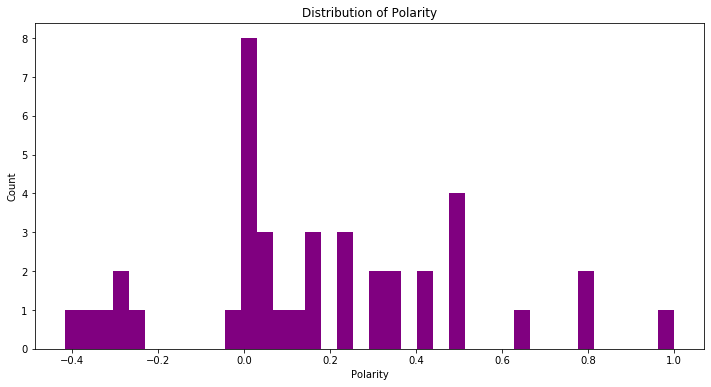

In [36]:
#polarity distribution
n_bins= 38
plt.figure(figsize=(12,6))
n, bins, patches= plt.hist(df["Polarity"], n_bins, facecolor='purple')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Distribution of Polarity')
plt.show()

In [37]:
#using the nltk sentiment analyser
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [38]:
#sentiment analyser function
def analyser(reviews):
    sent_score = SentimentIntensityAnalyzer().polarity_scores(reviews)
    negative= sent_score['neg']
    positive= sent_score['pos']
    if negative > positive:
        return "negative sentiment"
    elif negative < positive:
        return "positive sentiment"
    else:
        return "neutral sentiment"
  

In [39]:
df['nltk_sentiment'] = df['review_processed'].apply(analyser)

In [40]:
df.head()

,reviews,ratings,review_processed,Polarity,Subjectivity,nltk_sentiment
0,cheap parts broke in the first hour unable to...,2.0,cheap parts broke first hour unable repair,0.050000,0.511111,negative sentiment
1,i m sure it d he fun if it worked battery was...,1.0,sure fun worked battery already installed mean...,0.218056,0.421759,positive sentiment
2,i got this for a christmas gift and he has al...,5.0,got christmas gift already played hours since ...,0.160000,0.540000,positive sentiment
3,my nephew opened this on christmas eve and it...,1.0,nephew opened christmas eve make next morning ...,-0.375000,0.375000,negative sentiment
4,i bought this for my young brother and he lov...,5.0,bought young brother loves every thing works p...,0.633333,0.766667,positive sentiment


In [41]:
lem = WordNetLemmatizer()
tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [42]:
def lemmatize_review(reviews):
    return [lem.lemmatize (word) for word in tokenizer.tokenize(reviews)]

In [43]:
df['lemmatized_review'] = df['review_processed'].apply(lemmatize_review)

In [44]:
#ML
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import naive_bayes


In [45]:
#tdifvectorizer

In [46]:
vectorizer= TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stop_words)

In [47]:
x = vectorizer.fit_transform(df['review_processed'])
x.shape

(40, 441)

In [48]:
y = df['ratings']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=38)

In [50]:
model=naive_bayes.MultinomialNB()

In [51]:
model.fit(X_train, y_train)

MultinomialNB()

In [52]:
y_predict =model.predict(X_test)

In [53]:
from sklearn.metrics import classification_report
clf=classification_report(y_test, y_predict)

C:\Users\Lala\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
print(clf)

              precision    recall  f1-score   support

        1.0        0.71      1.00      0.83         5
        2.0        0.00      0.00      0.00         1
        3.0        0.00      0.00      0.00         1
        5.0        1.00      1.00      1.00         1

    accuracy                           0.75         8
   macro avg       0.43      0.50      0.46         8
weighted avg       0.57      0.75      0.65         8



In [52]:
#count vectorizer

In [55]:
cvectorizer= CountVectorizer(max_features = 400, stop_words=stop_words)

In [56]:
x = cvectorizer.fit_transform(df['review_processed'])
x.shape

(40, 400)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=38)

In [58]:
model=naive_bayes.MultinomialNB()
model.fit(X_train, y_train)
y_predict =model.predict(X_test)

In [59]:
from sklearn.metrics import classification_report
clf=classification_report(y_test, y_predict)
print(clf)

              precision    recall  f1-score   support

        1.0        1.00      0.60      0.75         5
        2.0        0.00      0.00      0.00         1
        3.0        0.00      0.00      0.00         1
        4.0        0.00      0.00      0.00         0
        5.0        0.25      1.00      0.40         1

    accuracy                           0.50         8
   macro avg       0.25      0.32      0.23         8
weighted avg       0.66      0.50      0.52         8



C:\Users\Lala\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lala\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
